In [3]:

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data=pd.read_csv('Loan_Default.csv')

data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [14]:
originalData=data.copy()

In [15]:
data.shape


(148670, 34)

In [16]:
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [17]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [18]:
data[data.duplicated()]

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

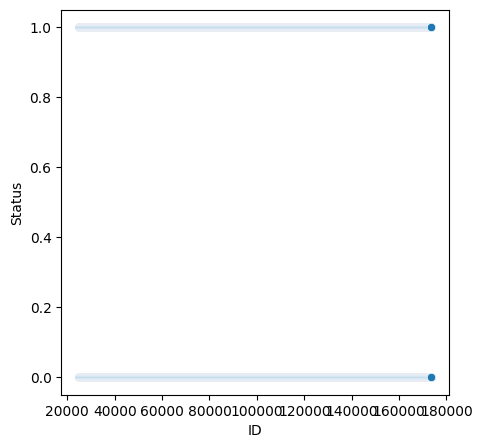

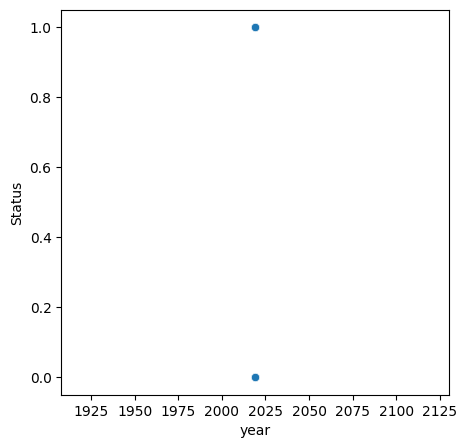

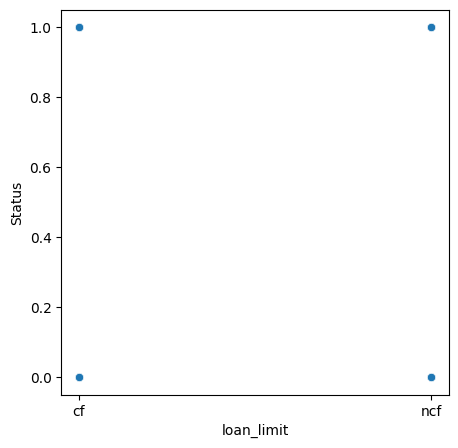

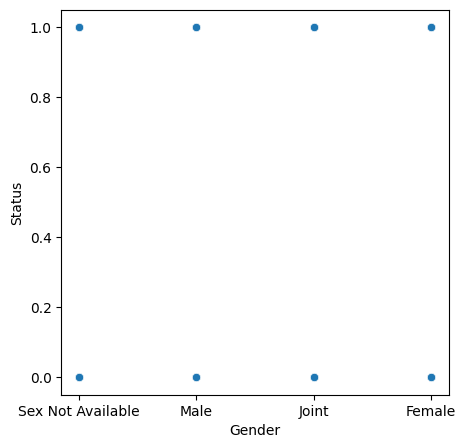

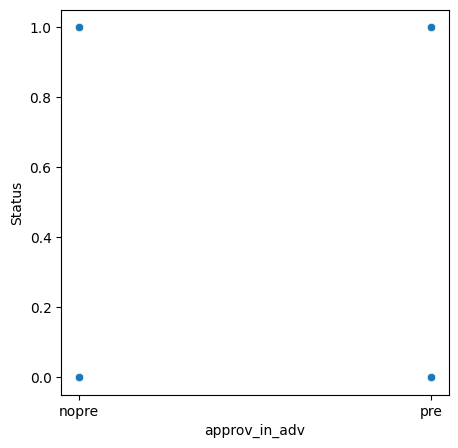

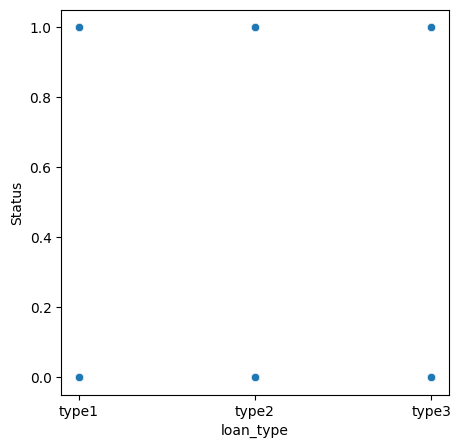

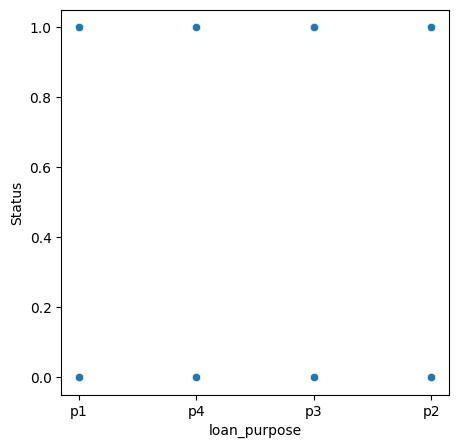

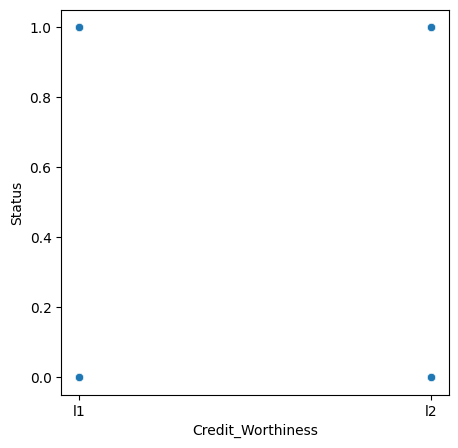

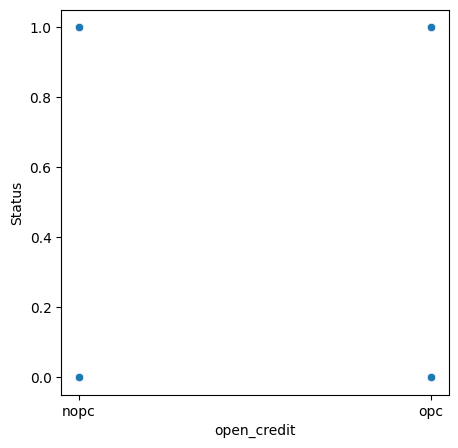

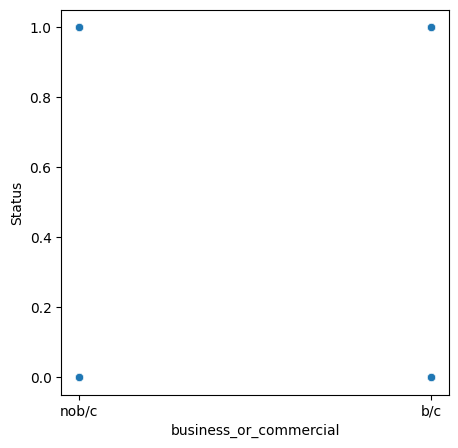

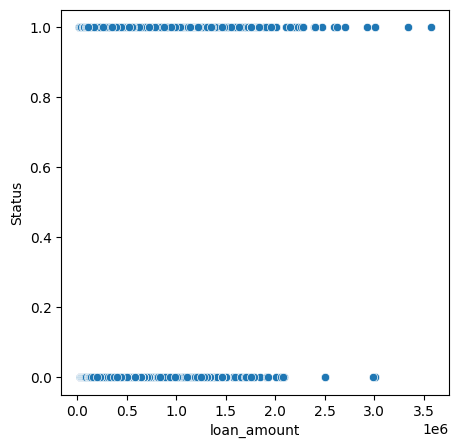

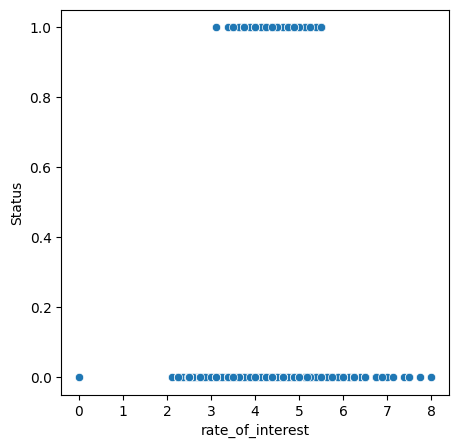

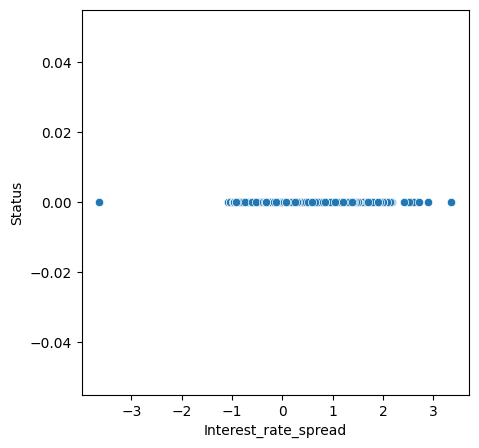

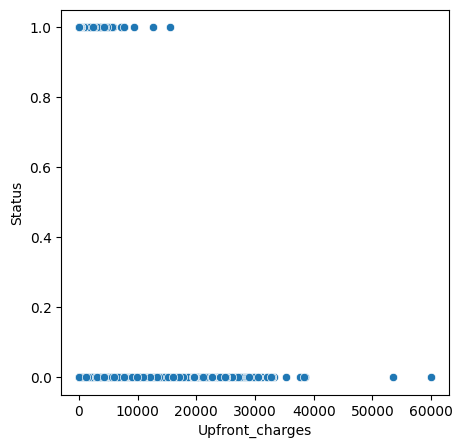

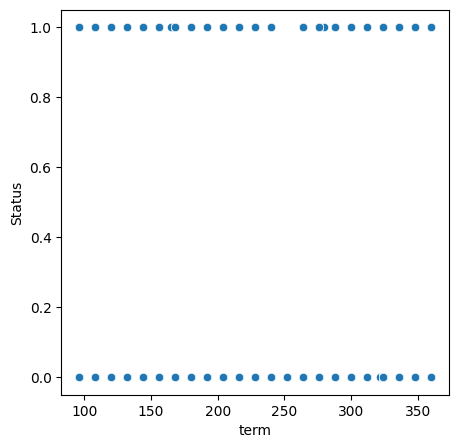

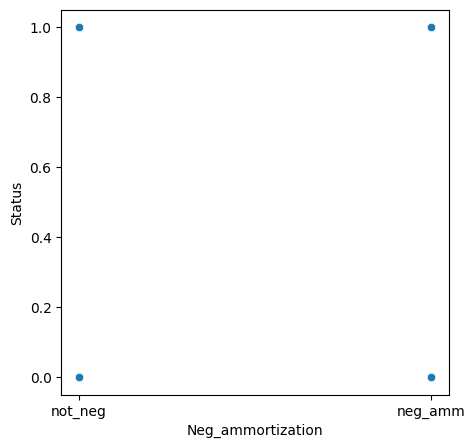

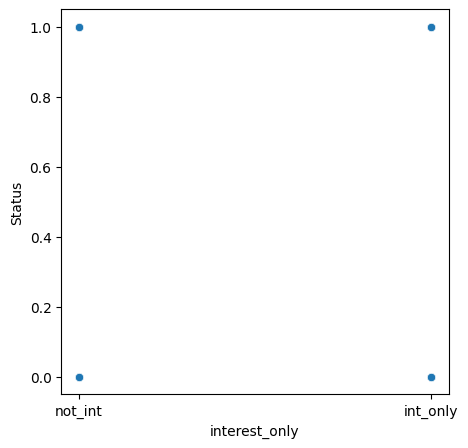

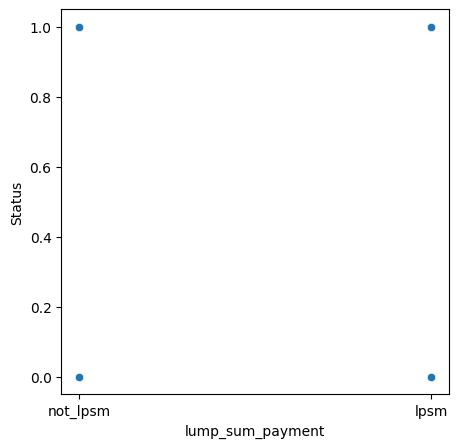

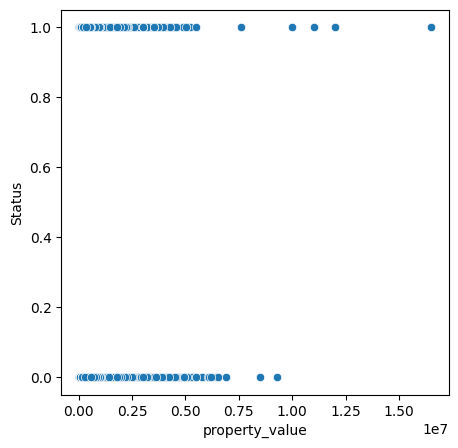

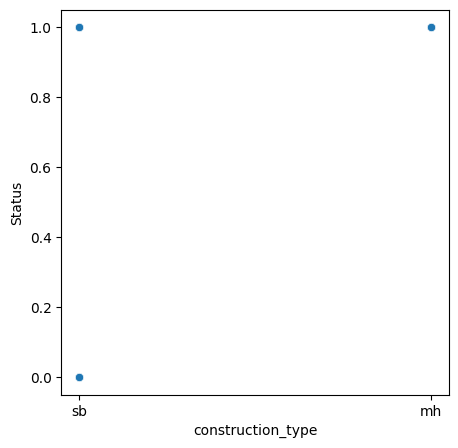

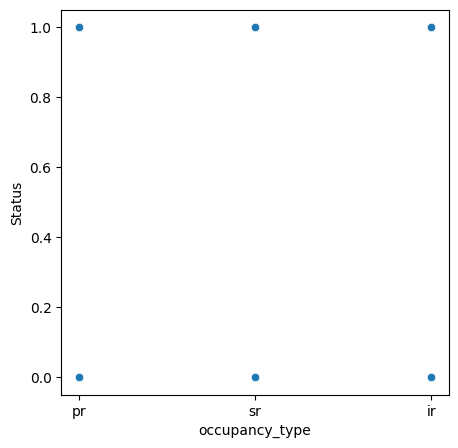

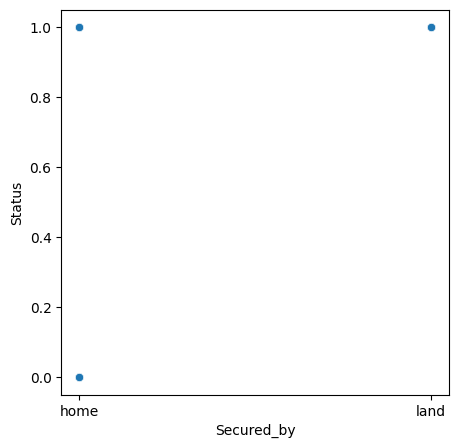

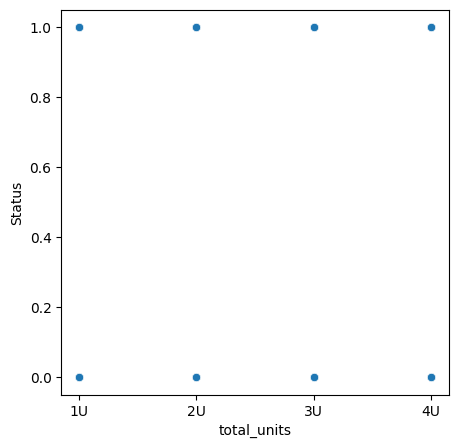

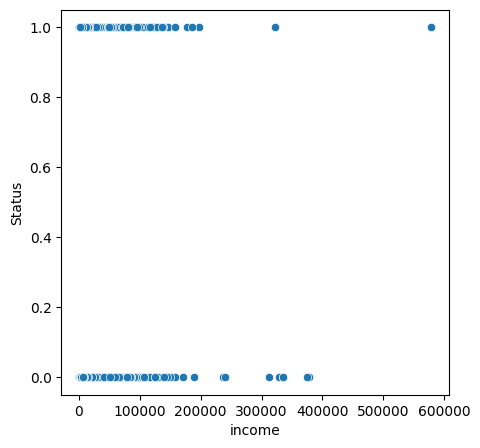

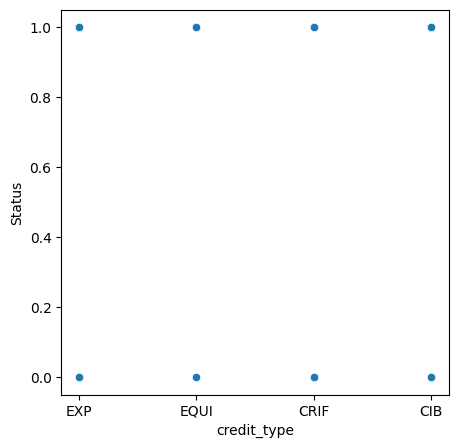

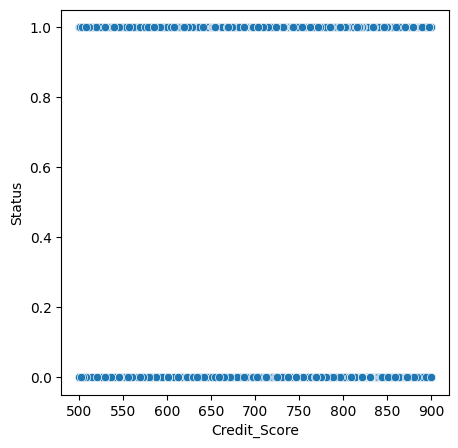

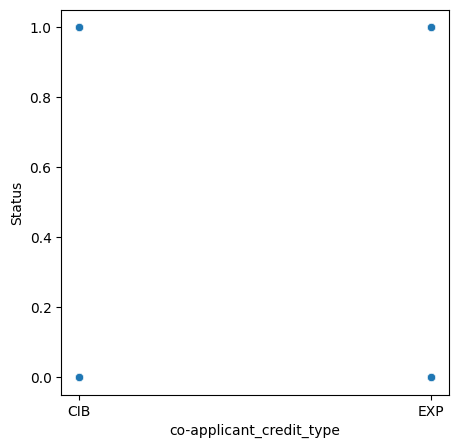

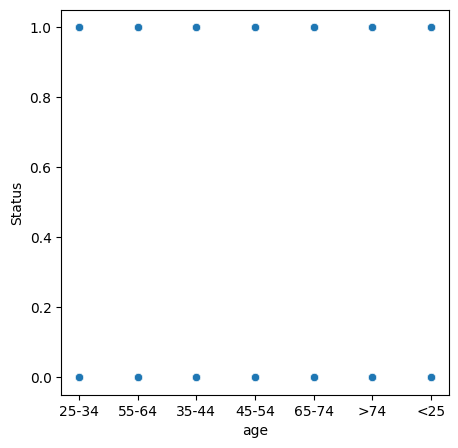

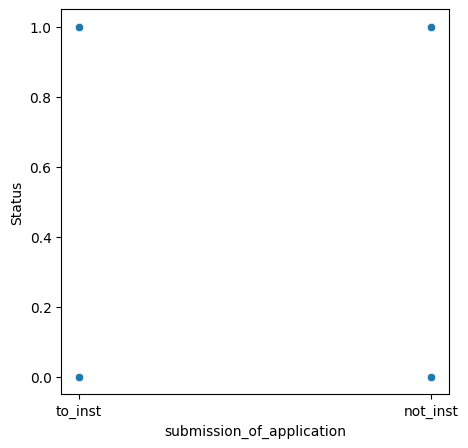

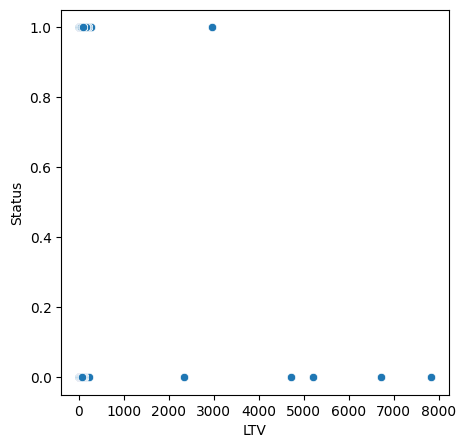

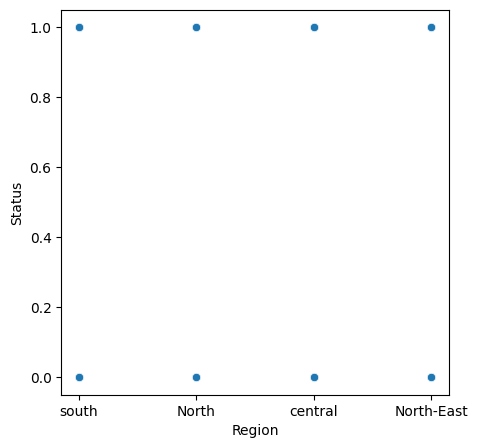

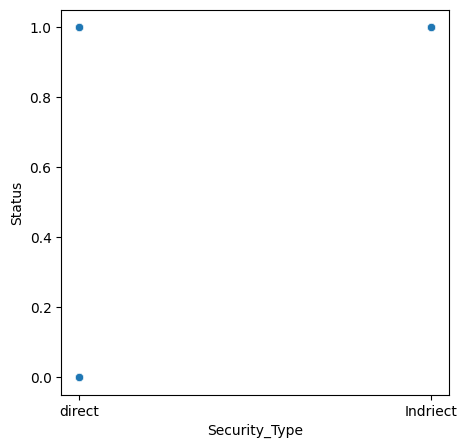

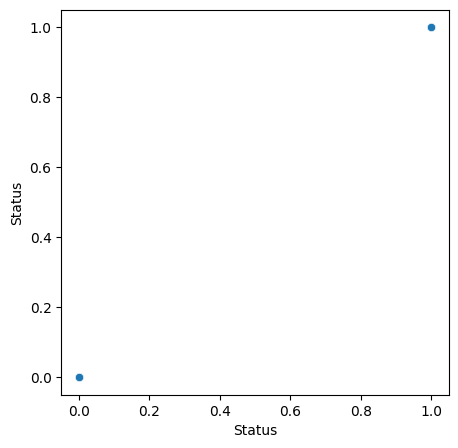

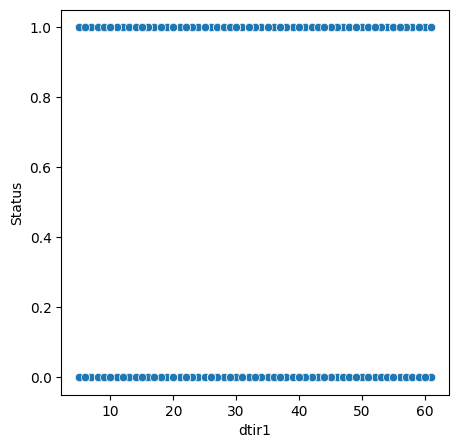

In [20]:
# visulaize the relation between all the features and the target variable, to identify the best features

for col in data.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot( x = data.loc[:,col], y = data.Status)
    plt.show()

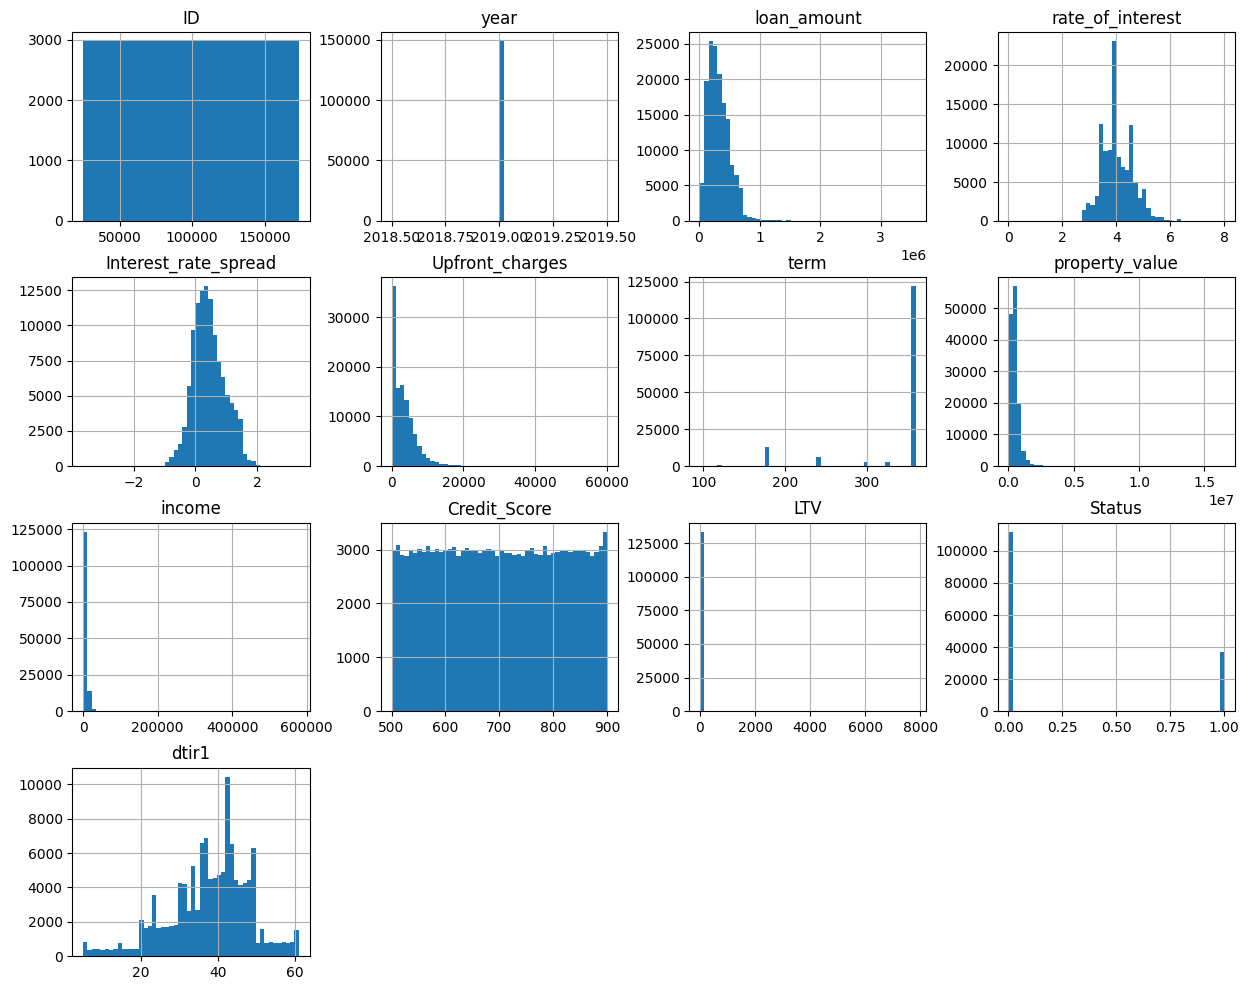

In [21]:
#visualize the dataset, to find patterns and identify outliers

data.hist(bins=50, figsize=(15,12))
plt.show()

In [22]:
#find out columns where there are null values
data.isnull().sum()


ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [6]:
#separate numerical and cateorical columns for imputation

numerical_columns=data.select_dtypes(include=np.number).columns
categorical_columns=data.select_dtypes(include=['object']).columns




In [7]:
cleaned_data=data

In [8]:
#for imputing data, use mean for numerical columns and mode for categorical columns

from sklearn.impute import SimpleImputer

impute_num=SimpleImputer(strategy='mean')

cleaned_data[numerical_columns]=impute_num.fit_transform(cleaned_data[numerical_columns])

impute_cat=SimpleImputer(strategy='most_frequent')

cleaned_data[categorical_columns]=impute_cat.fit_transform(cleaned_data[categorical_columns])

cleaned_data.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [9]:
#correltion matrix for identify relationships between the numerical features

numeric_columns=data.select_dtypes(include=np.number)
corr_matrix=numeric_columns.corr()
corr_matrix


,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
ID,1.000000,NaN,-0.000566,0.000384,2.030319e-03,-0.004717,-0.004055,0.000938,0.002456,-0.001036,-0.005545,1.703122e-03,-0.007441
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,-0.000566,NaN,1.000000,-0.124675,-3.114866e-01,0.053403,0.174450,0.687798,0.443258,0.004438,0.036410,-3.682528e-02,0.013634
rate_of_interest,0.000384,NaN,-0.124675,1.000000,6.143210e-01,-0.073862,0.183073,-0.107017,-0.029674,-0.001155,-0.000211,1.952158e-03,0.042404
Interest_rate_spread,0.002030,NaN,-0.311487,0.614321,1.000000e+00,0.032448,-0.137368,-0.291804,-0.112000,-0.001506,0.038529,-2.869794e-17,0.060313
Upfront_charges,-0.004717,NaN,0.053403,-0.073862,3.244849e-02,1.000000,-0.047253,0.044650,0.014524,-0.001269,-0.029832,-1.423662e-03,-0.001243
term,-0.004055,NaN,0.174450,0.183073,-1.373677e-01,-0.047253,1.000000,0.042761,-0.053317,-0.003149,0.101260,-2.397804e-04,0.103847
property_value,0.000938,NaN,0.687798,-0.107017,-2.918041e-01,0.044650,0.042761,1.000000,0.387084,0.002303,-0.215102,-3.952952e-02,-0.055501
income,0.002456,NaN,0.443258,-0.029674,-1.119996e-01,0.014524,-0.053317,0.387084,1.000000,0.000777,-0.028868,-6.369843e-02,-0.253248
Credit_Score,-0.001036,NaN,0.004438,-0.001155,-1.506292e-03,-0.001269,-0.003149,0.002303,0.000777,1.000000,-0.005244,4.003694e-03,-0.000286


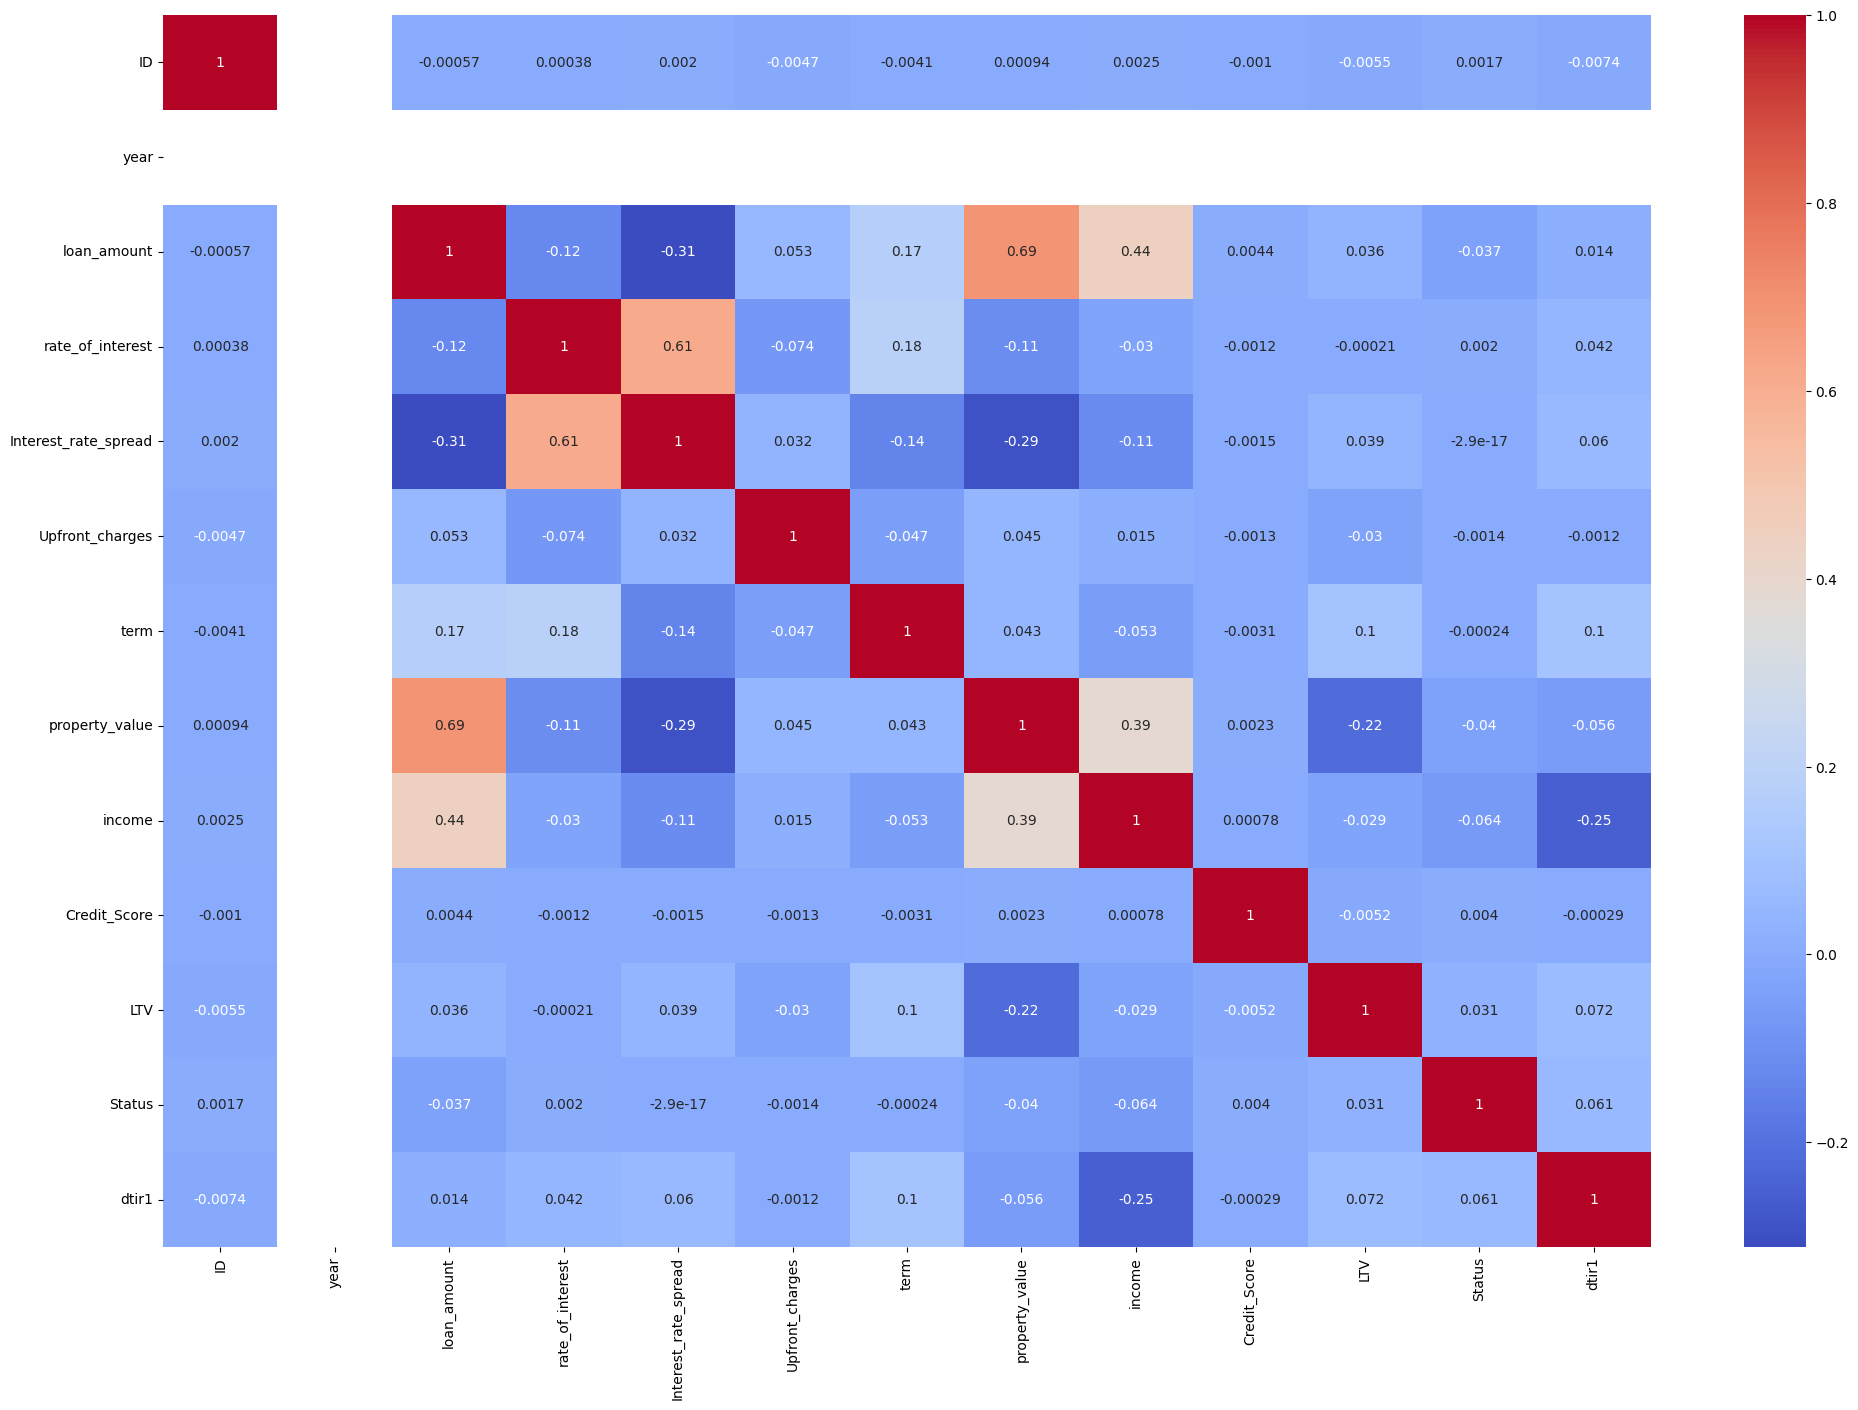

In [10]:
#heatmap
plt.figure(figsize=(24,16))

sns.heatmap(corr_matrix, cmap='coolwarm' , annot = True) 
plt.show()

In [11]:
 #drop these columns as they have high corelation with corresponding columns
cleaned_data.drop(['year', 'ID','Upfront_charges','term', 'dtir1','property_value','Interest_rate_spread'],axis=1,inplace=True)

In [12]:
numerical_columns=cleaned_data.select_dtypes(include=np.number)

numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amount       148670 non-null  float64
 1   rate_of_interest  148670 non-null  float64
 2   income            148670 non-null  float64
 3   Credit_Score      148670 non-null  float64
 4   LTV               148670 non-null  float64
 5   Status            148670 non-null  float64
dtypes: float64(6)
memory usage: 6.8 MB


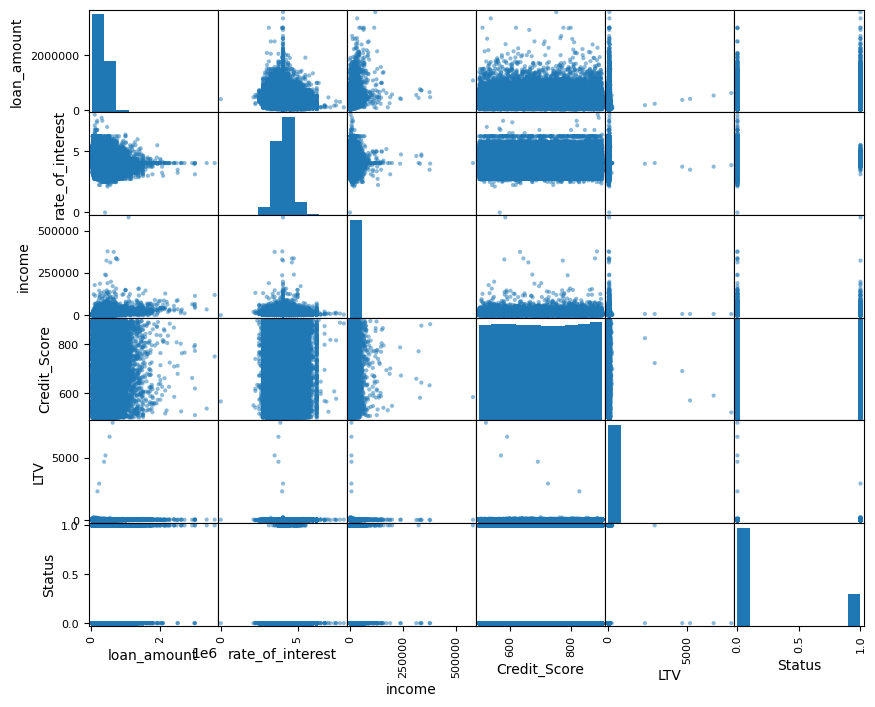

In [30]:
#visualization for numerical_data

from pandas.plotting import scatter_matrix

scatter_matrix(numerical_columns, figsize = (10,8))
plt.show()

In [ ]:
#boxplot for indentify outliers

for col in numerical_columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(x=cleaned_data.loc[:,col])
    plt.show()

#here the box plots for income, rate of interest and loan amount show a lot of outlier
#thus outlier removal is neccesary for clean data


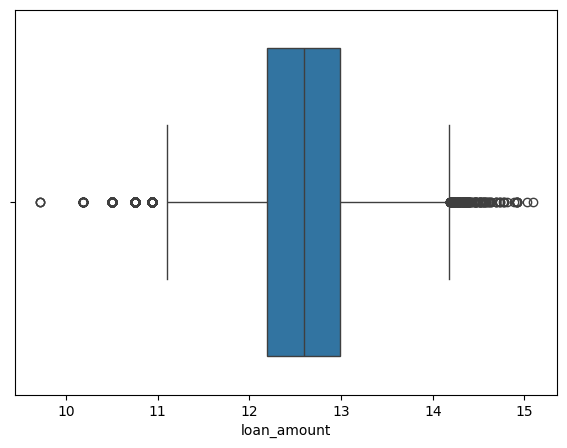

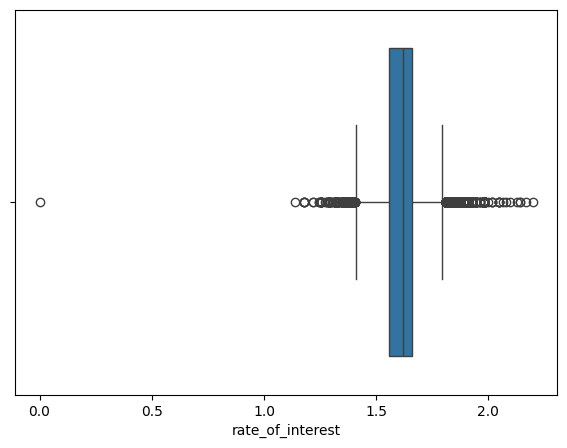

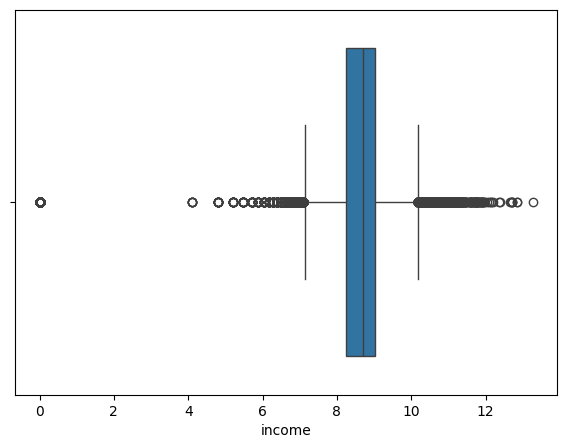

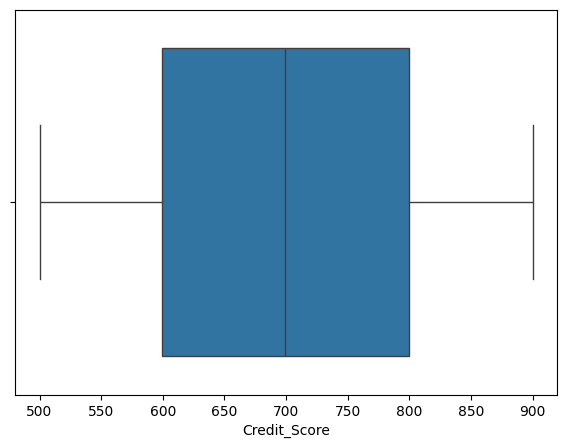

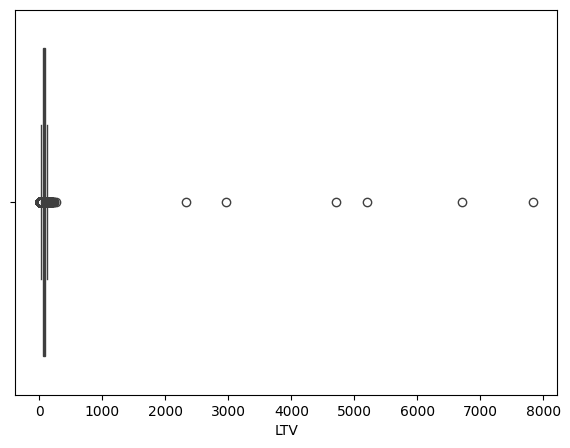

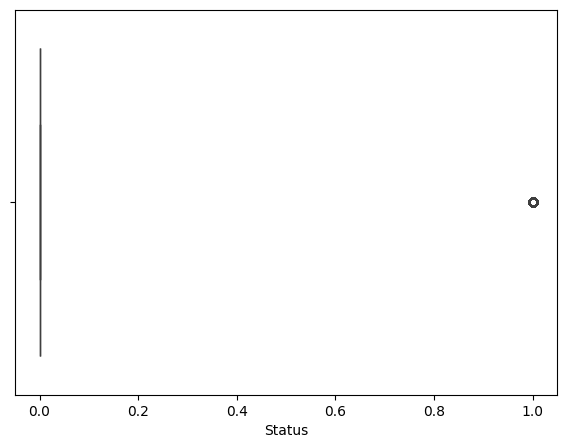

In [13]:
#log method for remvoving outliers


def applyLog(data,column):
    data[column]=np.log1p(data[column])
    return data
col_name= ['loan_amount','rate_of_interest','income']
cleaned_data = applyLog(cleaned_data.copy(),col_name)
for col in numerical_columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(x=cleaned_data.loc[:,col])
    plt.show()

In [ ]:
#outlier removal using iqr, inefficient and removes a lot of values


'''def outlier_iqr(data, columns):
    filtered_data = data.copy()

    for column in columns:
        q1 = filtered_data[column].quantile(0.25)
        q3 = filtered_data[column].quantile(0.75)
        iqr = q3 - q1

        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr

        filtered_data = filtered_data[
            (filtered_data[column] >= lower_limit) & (filtered_data[column] <= upper_limit)
        ]
    
    return filtered_data

numerical_columns = ['loan_amount', 'rate_of_interest', 'income']

cleaned_data = outlier_iqr(data, numerical_columns)



for col in numerical_columns:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=cleaned_data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()'''

In [ ]:
cleaned_data

In [14]:
from sklearn.preprocessing import LabelEncoder
cleaned_data


,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,11.665655,1.618492,...,7.462215,EXP,758.0,CIB,25-34,to_inst,98.728814,south,direct,1.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,12.238061,1.618492,...,8.513386,EQUI,552.0,EXP,55-64,to_inst,72.746457,North,direct,1.0
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,12.915342,1.715598,...,9.157045,EXP,834.0,CIB,35-44,to_inst,80.019685,south,direct,0.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,13.031346,1.658228,...,9.382696,EXP,587.0,CIB,45-54,not_inst,69.376900,North,direct,0.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,13.453825,1.609438,...,9.253496,CRIF,602.0,EXP,25-34,not_inst,91.886544,North,direct,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,12.986546,1.417066,...,8.969669,CIB,659.0,EXP,55-64,to_inst,71.792763,south,direct,0.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,13.281930,1.822935,...,8.873608,CIB,569.0,CIB,25-34,not_inst,74.428934,south,direct,0.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,13.009197,1.417066,...,8.839422,CIB,702.0,EXP,45-54,not_inst,61.332418,North,direct,0.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,12.188423,1.504077,...,8.873608,EXP,737.0,EXP,55-64,to_inst,70.683453,North,direct,0.0


In [15]:
cleaned_data.Status.value_counts()

Status
0.0    112031
1.0     36639
Name: count, dtype: int64

In [34]:
categorical_columns




Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

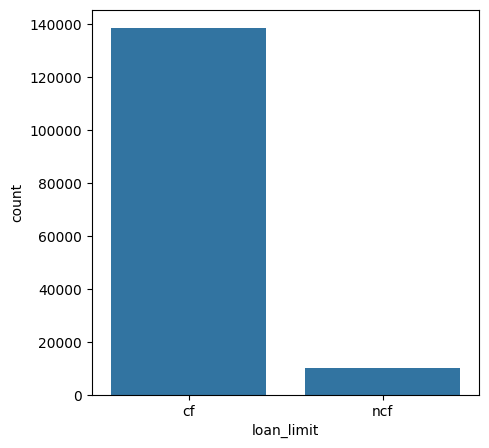

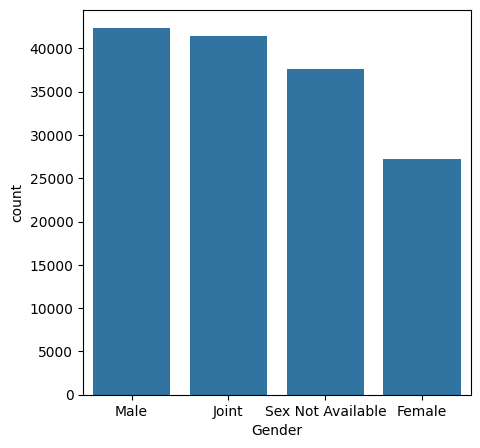

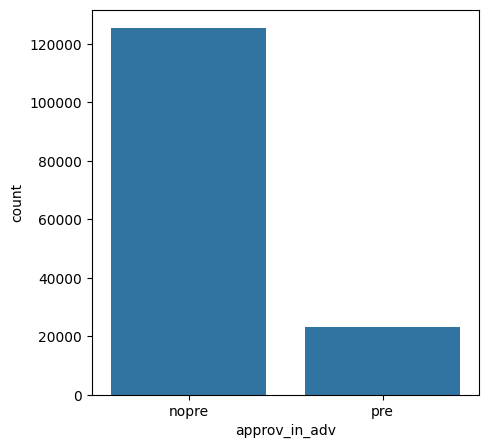

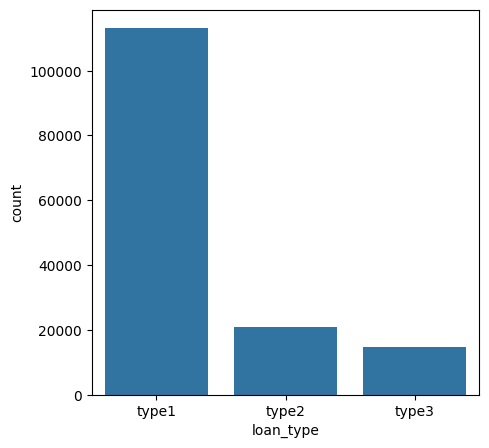

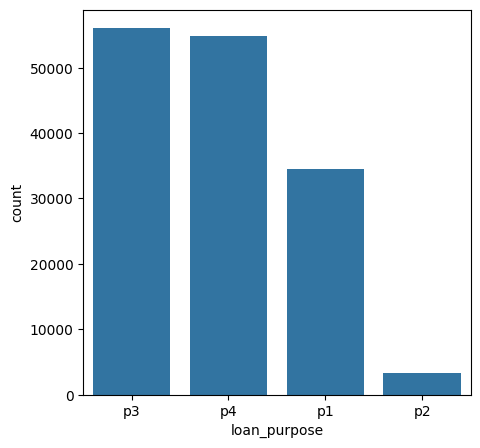

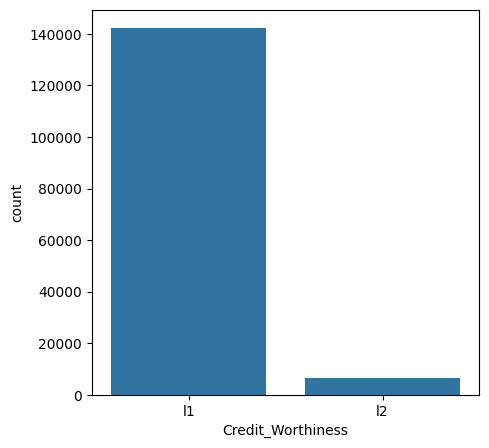

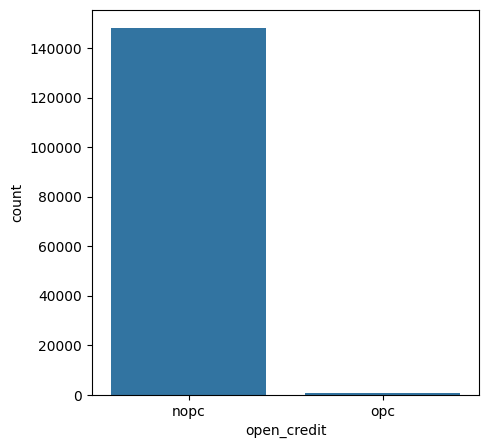

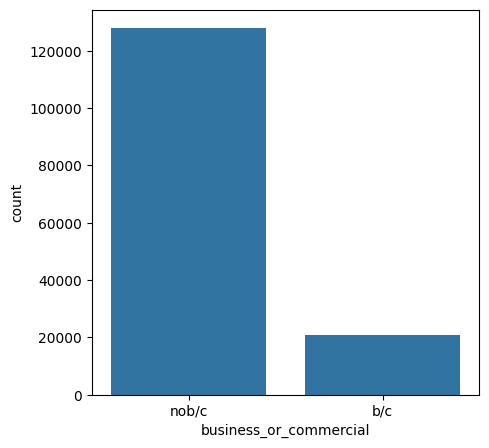

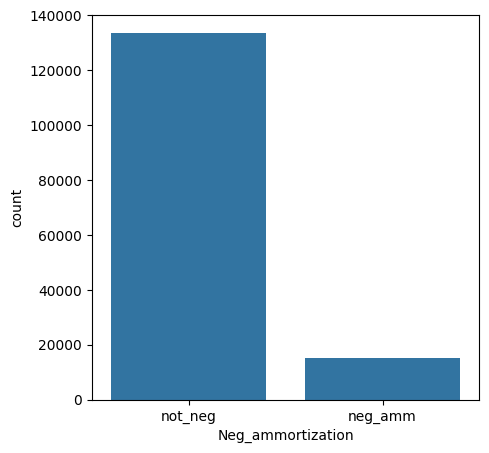

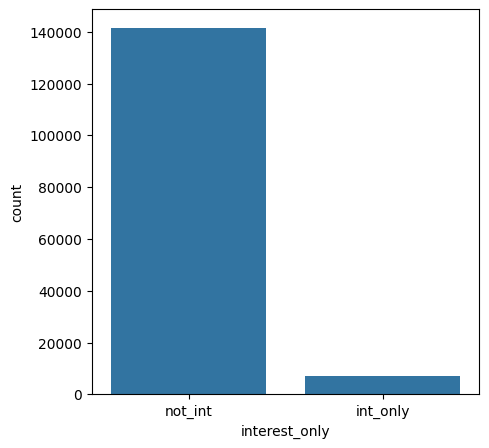

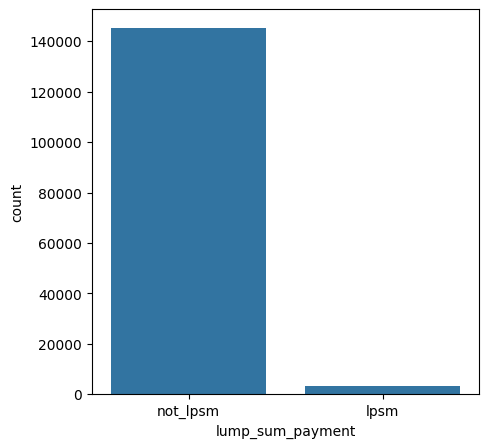

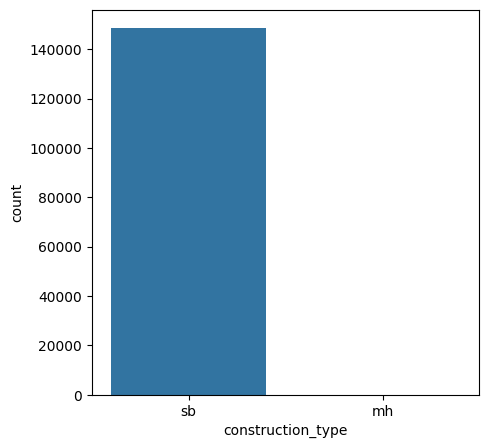

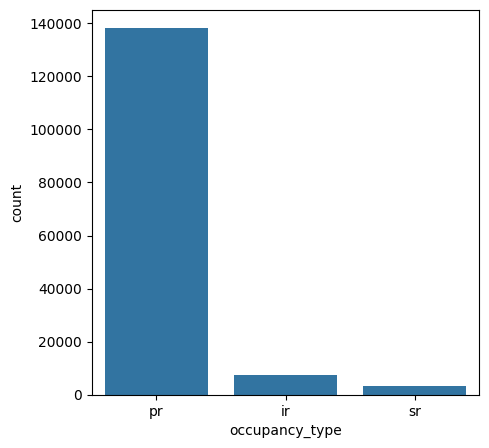

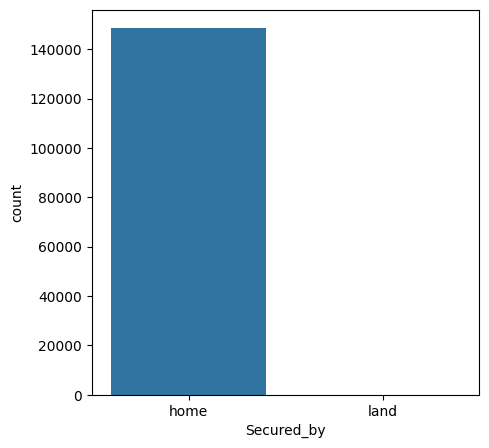

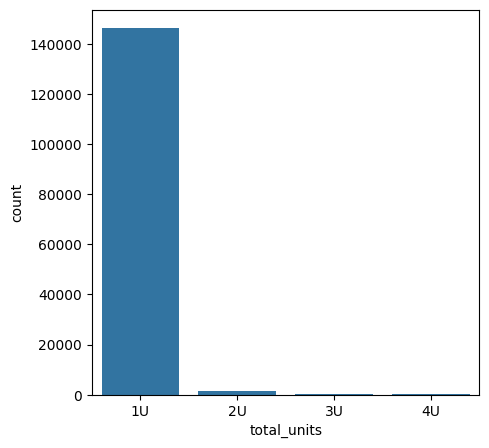

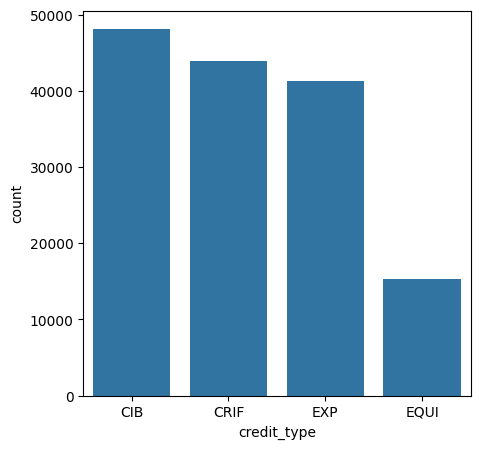

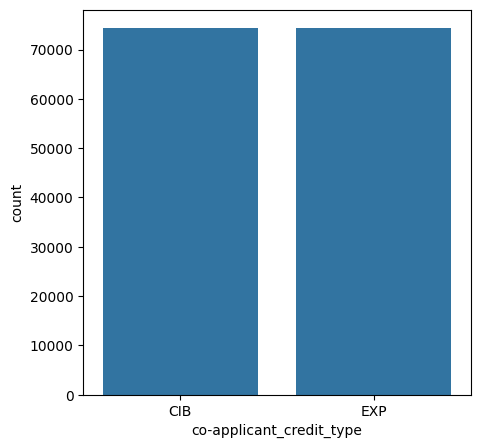

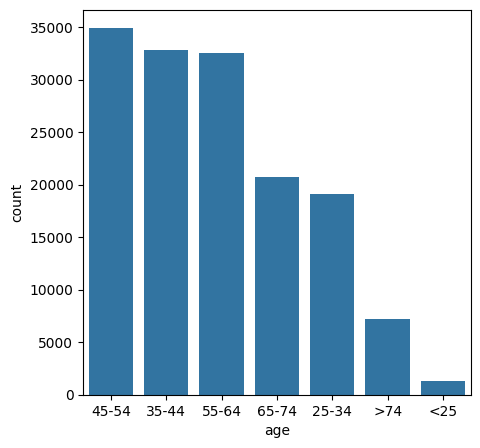

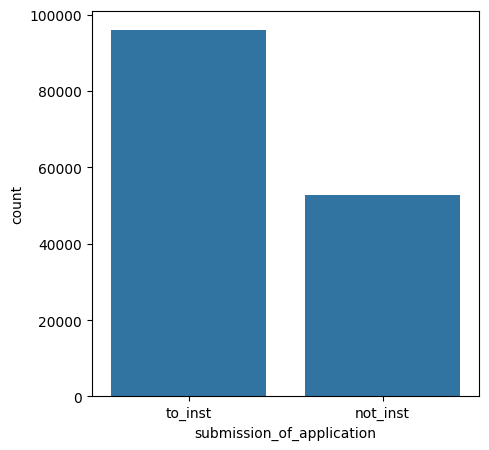

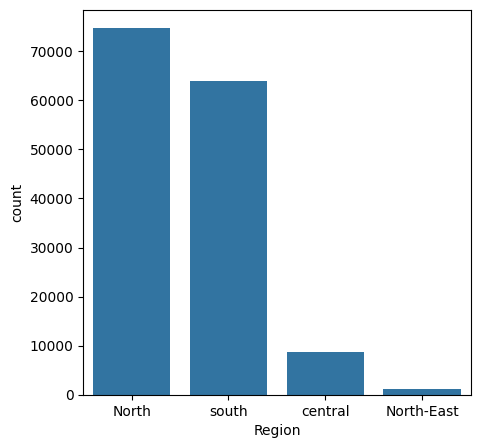

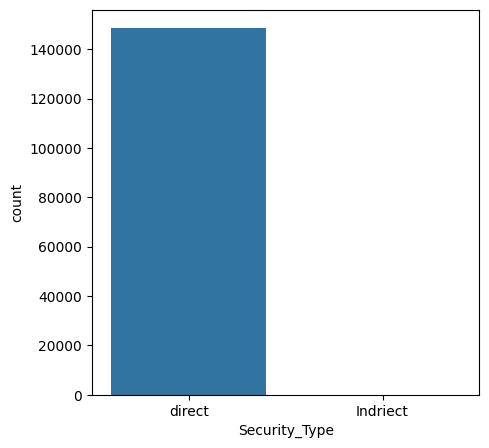

In [35]:

#visualtion for number of values of differnet features


for col in categorical_columns:
    plt.figure(figsize=(5,5))
    sns.countplot(x=cleaned_data[col], order = cleaned_data[col].value_counts().index)
    plt.show()

In [ ]:
grid = sns.PairGrid(cleaned_data)
grid.map(sns.scatterplot)


In [16]:
#encoding the categorivcal columns to numeric


'''encoding_columns=['loan_limit','Gender','approv_in_adv','loan_type','loan_purpose','Credit_Worthiness','open_credit',
                  'business_or_commercial','Neg_ammortization','interest_only','lump_sum_payment','construction_type',
                  'occupancy_type','Secured_by','total_units','credit_type','co-applicant_credit_type','age','submission_of_application',
                  'Region','Security_Type']'''

encoding_columns=categorical_columns



encoder=LabelEncoder()
for col in encoding_columns:
    cleaned_data.loc[:,col]=encoder.fit_transform(cleaned_data[col])
cleaned_data

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,0,3,0,0,0,0,0,1,11.665655,1.618492,...,7.462215,3,758.0,0,0,1,98.728814,3,1,1.0
1,0,2,0,1,0,0,0,0,12.238061,1.618492,...,8.513386,2,552.0,1,3,1,72.746457,0,1,1.0
2,0,2,1,0,0,0,0,1,12.915342,1.715598,...,9.157045,3,834.0,0,1,1,80.019685,3,1,0.0
3,0,2,0,0,3,0,0,1,13.031346,1.658228,...,9.382696,3,587.0,0,2,0,69.376900,0,1,0.0
4,0,1,1,0,0,0,0,1,13.453825,1.609438,...,9.253496,1,602.0,1,0,0,91.886544,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0,3,0,0,2,0,0,1,12.986546,1.417066,...,8.969669,0,659.0,1,3,1,71.792763,3,1,0.0
148666,0,2,0,0,0,0,0,1,13.281930,1.822935,...,8.873608,0,569.0,0,0,0,74.428934,3,1,0.0
148667,0,2,0,0,3,0,0,1,13.009197,1.417066,...,8.839422,0,702.0,1,2,0,61.332418,0,1,0.0
148668,0,0,0,0,3,0,0,1,12.188423,1.504077,...,8.873608,3,737.0,1,3,1,70.683453,0,1,0.0


In [37]:
#chedking if all the values in the columns are correct after encoding 
all_columns=cleaned_data.columns
for col in all_columns:
    count=data.loc[:,col].value_counts()
    print(count)

loan_limit
cf     138692
ncf      9978
Name: count, dtype: int64
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64
approv_in_adv
nopre    125529
pre       23141
Name: count, dtype: int64
loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64
loan_purpose
p3    56068
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64
Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64
open_credit
nopc    148114
opc        556
Name: count, dtype: int64
business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64
loan_amount
206500.0     4610
256500.0     4079
156500.0     3967
226500.0     3944
486500.0     3819
             ... 
2206500.0       1
1746500.0       1
2396500.0       1
3576500.0       1
1956500.0       1
Name: count, Length: 211, dtype: int64
rate_of_interest
4.045476    36439
3.990000    14455
3.625000     8800
3.875000    

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
#separate the features and the target variable

X=cleaned_data.drop('Status',axis=1)
y=cleaned_data.Status




In [19]:
y.value_counts()

Status
0.0    112031
1.0     36639
Name: count, dtype: int64

In [20]:
#make the train and test sets


X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape

(118936, 26)

In [21]:
X_train.drop(['Secured_by','Security_Type','construction_type','total_units','interest_only','Region','occupancy_type','approv_in_adv'
             ,'age','open_credit','Credit_Score','Credit_Worthiness','loan_limit','Gender'
                ,'submission_of_application'],axis=1,inplace=True)
X_test.drop(['Secured_by','Security_Type','construction_type','total_units','interest_only','Region','occupancy_type','approv_in_adv'
             ,'age','open_credit','Credit_Score','Credit_Worthiness','loan_limit','Gender'
                ,'submission_of_application'],axis=1,inplace=True)

In [22]:
y_train.shape

(118936,)

In [23]:
y_test.shape

(29734,)

In [24]:
#Check if the target variable has distinct counts

y_train.value_counts()

Status
0.0    89625
1.0    29311
Name: count, dtype: int64

In [25]:
y_test.value_counts()

Status
0.0    22406
1.0     7328
Name: count, dtype: int64

In [26]:
#Standardize the data for better accuracy 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [27]:
X_train

array([[-0.51997057,  0.97818131,  0.40221805, ...,  1.39380238,
         1.00254241, -1.11351735],
       [-0.51997057, -1.64656426,  0.40221805, ..., -1.11688688,
        -0.99746403, -0.07141068],
       [-0.51997057,  0.10326612,  0.40221805, ..., -1.11688688,
        -0.99746403, -0.65175253],
       ...,
       [-0.51997057,  0.97818131,  0.40221805, ..., -1.11688688,
        -0.99746403, -0.36936915],
       [-0.51997057,  0.10326612,  0.40221805, ..., -0.27999046,
        -0.99746403,  0.46273352],
       [ 2.5571127 ,  0.97818131,  0.40221805, ...,  1.39380238,
         1.00254241,  0.41357212]])

In [28]:
# logistic regression model
from sklearn.metrics import accuracy_score
linear_model = LogisticRegression()

linear_model.fit(X_train,y_train)

y_prediction = linear_model.predict(X_test)

accuracy = accuracy_score( y_test, y_prediction)

print(f"Accuracy:{accuracy}")

Accuracy:0.7857671352660254


In [89]:
#Decision tree model

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

tree_prediction= tree_model.predict(X_test)

tree_accuracy = accuracy_score( y_test, tree_prediction)

print("Accuracy: ", tree_accuracy)




Accuracy:  0.9995291585390462


In [91]:
from sklearn.metrics import classification_report

report = classification_report(y_test, tree_prediction)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22406
         1.0       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



In [69]:
#random forest classifier

from sklearn.ensemble import RandomForestClassifier


forest_model = RandomForestClassifier()

forest_model.fit(X_train, y_train)

forest_prediction= forest_model.predict(X_test)


forest_accuracy = accuracy_score( y_test, forest_prediction)

print("Accuracy: ", tree_accuracy)



Accuracy:  0.9996636846707473


In [ ]:
'''important_features = forest_model.feature_importances_
feature_names = X.columns

important_df = pd.DataFrame({'Features': feature_names, 'Importance': important_features})
important_df = important_df.sort_values(by='Importance',  ascending=True)

plt.figure(figsize=(10,16))
sns.barplot(x="Importance", y="Features", data = important_df)
plt.show()
'''

In [71]:
X_train

array([[-0.51997057,  0.97818131,  0.40221805, ...,  1.39380238,
         1.00254241, -1.11351735],
       [-0.51997057, -1.64656426,  0.40221805, ..., -1.11688688,
        -0.99746403, -0.07141068],
       [-0.51997057,  0.10326612,  0.40221805, ..., -1.11688688,
        -0.99746403, -0.65175253],
       ...,
       [-0.51997057,  0.97818131,  0.40221805, ..., -1.11688688,
        -0.99746403, -0.36936915],
       [-0.51997057,  0.10326612,  0.40221805, ..., -0.27999046,
        -0.99746403,  0.46273352],
       [ 2.5571127 ,  0.97818131,  0.40221805, ...,  1.39380238,
         1.00254241,  0.41357212]])

In [29]:
linear_model.fit(X_train,y_train)

y_prediction2= linear_model.predict(X_test)

accuracy2 = accuracy_score( y_test, y_prediction2)

print(f"Accuracy:{accuracy2}")

Accuracy:0.7857671352660254


In [30]:
#making a classification report to understand the acurracy and precision on model
from sklearn.metrics import classification_report

report = classification_report(y_test, y_prediction)

print(report)

              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87     22406
         1.0       0.72      0.21      0.33      7328

    accuracy                           0.79     29734
   macro avg       0.76      0.59      0.60     29734
weighted avg       0.77      0.79      0.74     29734



In [34]:
#since model is not working well for target variable, we try to upsample it to increase accuracy
#Here we use Random Sampler to upsample the data
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42,sampling_strategy='auto')

X_train_resampled , y_train_resampled  = oversampler.fit_resample(X_train, y_train)
X_test_resampled , y_test_resampled  = oversampler.fit_resample(X_test, y_test)





In [35]:
X_train_resampled.shape

(179250, 11)

In [36]:
#here the number of values in both labels becomes equal
y_train_resampled.value_counts()

Status
0.0    89625
1.0    89625
Name: count, dtype: int64

In [38]:
y_test.shape

(29734,)

In [39]:
X_test

array([[-0.52089102,  0.10296888,  0.40556944, ..., -1.12094427,
         0.99369713, -1.11673769],
       [-0.52089102, -1.64906363,  0.40556944, ..., -1.12094427,
         0.99369713,  0.73551   ],
       [-0.52089102,  0.10296888,  0.40556944, ...,  1.39599561,
        -1.00634284, -1.19143492],
       ...,
       [ 2.56563221, -1.64906363,  0.40556944, ..., -1.12094427,
         0.99369713, -0.12963099],
       [-0.52089102,  0.10296888,  0.40556944, ..., -1.12094427,
        -1.00634284,  0.06494569],
       [-0.52089102,  0.97898514,  0.40556944, ..., -1.12094427,
        -1.00634284,  0.6059992 ]])

In [40]:
#train the model on the upsampled data
linear_model.fit(X_train_resampled, y_train_resampled)

resampled_prediction = linear_model.predict(X_test)

resampled_accuracy = accuracy_score(y_test, resampled_prediction)

print(resampled_accuracy)


0.6860496401425977


In [41]:
resampled_report = classification_report(y_test, resampled_prediction)

print(resampled_report)

              precision    recall  f1-score   support

         0.0       0.85      0.70      0.77     22406
         1.0       0.41      0.63      0.50      7328

    accuracy                           0.69     29734
   macro avg       0.63      0.67      0.63     29734
weighted avg       0.74      0.69      0.70     29734



In [57]:
#since using random sampling did not give much improvement, we use the SMOTE method
from imblearn.over_sampling import SMOTEN

sm = SMOTEN(sampling_strategy='auto', random_state=0, k_neighbors=10)

X_train_smote , y_train_smote = sm.fit_resample(X_train, y_train)




KeyboardInterrupt: 

In [47]:
y_train_smote.value_counts()

Status
0.0    89625
1.0    89625
Name: count, dtype: int64

In [116]:
#train the model on the smote upsampled data

linear_model.fit(X_train_smote, y_train_smote)

smote_prediction = linear_model.predict(X_test)

smote_accuracy = accuracy_score(y_test, smote_prediction)

print(smote_accuracy)

0.6815093831976862


In [117]:
smote_report = classification_report(y_test, resampled_prediction)

print(smote_report)

              precision    recall  f1-score   support

         0.0       0.85      0.70      0.77     22406
         1.0       0.41      0.63      0.50      7328

    accuracy                           0.69     29734
   macro avg       0.63      0.67      0.63     29734
weighted avg       0.74      0.69      0.70     29734



In [115]:
#use cross validdation to calcuate average accuracy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(linear_model, X,y, cv=cv, scoring= 'accuracy')

print("Score:" ,cross_val_score)
print("Avergae score: ", cross_val_scores.mean())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Score: <function cross_val_score at 0x15d4c6e80>
Avergae score:  0.6670007398937243


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
from imblearn.over_sampling import SMOTE
minority_count = y_train.value_counts()[1]
desired_minority_count = int(minority_count*1.20)

linear_model = LogisticRegression(class_weight='balanced', max_iter=100)
sampling_strategy = {1:desired_minority_count} # affects only the minority count

smote1 = SMOTE(sampling_strategy= sampling_strategy, random_state= 42)

X_train_smote_10 , y_train_smote_10= smote1.fit_resample(X_train, y_train)

linear_model.fit(X_train_smote_10, y_train_smote_10)


smote_10_prediction = linear_model.predict(X_test)

accuracy_10 = accuracy_score(y_test, smote_10_prediction)
smote_report1 = classification_report(y_test, smote_10_prediction)

print(smote_report1 ,  smote_report)

              precision    recall  f1-score   support

         0.0       0.85      0.70      0.77     22406
         1.0       0.41      0.63      0.50      7328

    accuracy                           0.68     29734
   macro avg       0.63      0.67      0.63     29734
weighted avg       0.74      0.68      0.70     29734
               precision    recall  f1-score   support

         0.0       0.85      0.70      0.77     22406
         1.0       0.41      0.63      0.50      7328

    accuracy                           0.69     29734
   macro avg       0.63      0.67      0.63     29734
weighted avg       0.74      0.69      0.70     29734



In [ ]:
##using grid search to find the best parameters for the model and improve accuracy
from sklearn.model_selection import GridSearchCV
param_grid={'penalty ': ['l1']',
            'solver':[ 'saga'],
            'max_iter':100,
             'warm_state' :True,
                'multi_class':ovr,
               'n_jobs':-1 }

grid_search=GridSearchCV(linear_model, param_grid, cv=5, scoring='accuracy')


